## I. Import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1024)
np.set_printoptions(precision=2) 

## II. Lecture des données

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train_result = pd.read_csv("train_result.csv")

On observe nos données. Nous remarquons que la dernière colonnes n'est pas défini et que les valeurs de nos colonnes ne sont pas normalisées. (Idem pour `df_test`)

In [98]:
df_train

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24,NaN
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26,NaN
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26,NaN
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24,NaN


On coupe donc les dernières colonnes.

In [3]:
X_train = df_train.to_numpy()[:,:-1]
X_test = df_test.to_numpy()[:,:-1]
y_train = df_train_result["Class"].to_numpy()

### Observation des données

In [100]:
image_size_px = (28,56)

def mnist_random_example():
    idx = np.random.randint(50000)
    exp = X_train[idx].reshape(image_size_px[0],image_size_px[1])
    print("The number in the image below is:", y_train[idx])
    plt.imshow(exp)

The number in the image below is: 12


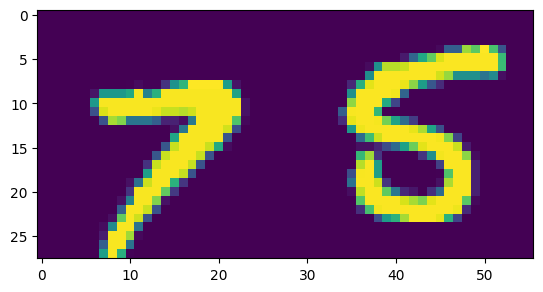

In [101]:
mnist_random_example()

### Variables utilitaires

In [15]:
n_classes = np.unique(y_train).shape[0] #19
d = X_train.shape[1]

## III. Normalisation et standarisation des données

### Data standarisation

In [5]:
def standarize(data):
    mu = np.mean(data, axis=1, keepdims=True)
    sigma = np.std(data, axis=1, keepdims=True)
    normalized = (data - mu)/sigma
    return normalized

In [6]:
X_train = standarize(X_train)
X_test = standarize(X_test)

In [7]:
X_train

array([[-0.44, -0.44, -0.44, ..., -0.44, -0.44, -0.44],
       [-0.41, -0.41, -0.41, ..., -0.41, -0.41, -0.41],
       [-0.45, -0.45, -0.45, ..., -0.45, -0.45, -0.45],
       ...,
       [-0.4 , -0.4 , -0.4 , ..., -0.4 , -0.4 , -0.4 ],
       [-0.42, -0.42, -0.42, ..., -0.42, -0.42, -0.42],
       [-0.44, -0.44, -0.44, ..., -0.44, -0.44, -0.44]])

### Data normalisation

## IV. Régression logistique

In [74]:
class LogisticRegression:

    def __init__(self, W, b):
        self.W = W
        self.b = b
    
    def g_x(self, X):
        """
        Notre fonction g(x)
        """
        return np.matmul(X, self.W) + self.b
    
    def softmax(self,z):
        '''
        Calcule du softmax
        '''
        return (np.exp(z).T / np.sum(np.exp(z),axis=1)).T 
    
    def predict_proba(self, X):
        """
        Application de softmax sur notre fonction
        """
        return self.softmax(self.g_x(X))
    
    def predict(self, X):
        """
        Argument maximum de notre softmax
        """
        return np.argmax(self.predict_proba(X), axis=1)
    
    def onehot(self, y):
        '''
        Encodage one hot pour nos données Y
        '''
        oh = np.zeros((len(y), y.max() + 1))
        oh[np.arange(len(y)), y] = 1
        return oh
    
    def gradient(self, X, y):
        """
        Calcule la dérivée du poid et du biais pour notre gradiant
        """
        Y_onehot = self.onehot(y)
        proba = self.predict_proba(X)
        dW = np.dot(X.T,(proba-Y_onehot))/X.shape[0]
        dB = np.sum(proba-Y_onehot,axis=0)/X.shape[0]
        return dW,dB
    
    def cost(self, X, y):
        """
        Calcule notre coût d'entropie croisée + régularisation
        """
        Y_onehot = self.onehot(y)
        y_head = self.predict_proba(X)
        entropie = -Y_onehot * np.log(y_head) - (1-Y_onehot)*np.log(1-y_head)
        return (1/d)*((np.mean(entropie)) + 0.5*self.reg * np.sum(self.W**2))
  

    def test(self, X, y): 
        """
        Calcule notre taux d'erreur
        """
        y_hat = self.predict(X)
        Y_onehot = self.onehot(y)
        error_rate = np.count_nonzero(y_hat - Y_onehot.argmax(axis=1)) / y_hat.shape[0]
        return error_rate
    
    def train(self, X, y,step_size, n_steps):
        """
        Pour un nombre d'étape de n_steps donné, on effectue
        une gradient descent sur les poids W du modèle.
        À chaque itération, on enregistre les pertes et le taux
        d'erreur, que l'on retourne suite à la dernière itération.
        """  
        self.reg = step_size
        cost = [] 
        errors = []
        
        for _ in range(n_steps):
            dW,dB = self.gradient(X,y)
            self.W -= step_size*dW 
            self.b -= step_size*dB 
            cost.append(self.cost(X, y))
            errors.append(self.test(X, y))
        return cost, errors

## V. Trouver le meilleur hyperparamètre

Fonction pour diviser nos données d'entrainement. On a 60000 inputs totales (train+test = 50000 + 10000), notre test est donc 1/6ème de notre totalité, on veut l'équivalent pour notre set de validation. Donc notre set de validation doit être de 10000

In [10]:
train_set, validation_set = X_train[:40000],X_train[40000:]
train_y, validation_y = y_train[:40000],y_train[40000:]

Après `np.arange(0.01,0.1,0.01)`, la fonction nous retourne 0.08 comme étant le meilleur paramètre.
On essaye donc sur `np.arange(0.07,0.09,0.0025)` et l'optimal devient 0.0825.

In [75]:
step_sizes = [0.0825]#np.arange(0.0825,0.085,0.0025)#np.arange(0.01,0.1,0.01)
accuracies = np.zeros(len(step_sizes))

On entraîne (avec un petit nombre de pas) nos paramètres que l'on test sur notre ensemble d'entrainement, puis on compare leurs précision sur notre ensemble de validation, et on prend la plus grande précision. 

In [76]:
def test_params(step_sizes):
	for i in range(len(step_sizes)):
		W = np.zeros((d,n_classes))
		b = np.zeros(n_classes)
		lr = LogisticRegression(W,b)
		lr.train(train_set, train_y, step_sizes[i], 30)
		pred = lr.predict(validation_set)
		accuracies[i] = sum([int(v)==int(p) for v,p in zip(validation_y,pred)])/len(pred)

	return step_sizes[np.argmax(accuracies)], np.max(accuracies)

In [77]:
test_params(step_sizes)

(0.0825, 0.0114)

## VI. Model final

Initialisation des parametres aléatoirement pour optimiser le gradient

In [18]:
W = np.random.rand(d,n_classes)
b = np.random.rand(1,n_classes)
model = LogisticRegression(W,b)

In [19]:
W

array([[0.65, 1.  , 0.52, ..., 0.8 , 0.2 , 0.81],
       [0.14, 0.68, 0.06, ..., 0.77, 0.26, 0.05],
       [0.86, 0.26, 0.4 , ..., 0.59, 0.19, 0.43],
       ...,
       [0.46, 0.74, 0.84, ..., 0.48, 0.45, 0.7 ],
       [0.22, 0.87, 0.72, ..., 0.59, 0.56, 0.22],
       [0.91, 0.86, 0.7 , ..., 0.  , 0.62, 0.99]])

In [93]:
cost, errors = model.train(X_train,y_train,0.0825,500)

Text(0, 0.5, 'Cost')

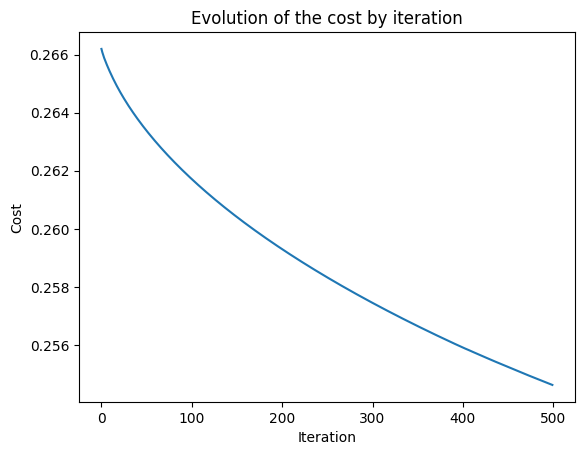

In [94]:
plt.plot(list(range(len(cost))),cost)
plt.title('Evolution of the cost by iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')

Text(0, 0.5, 'Error')

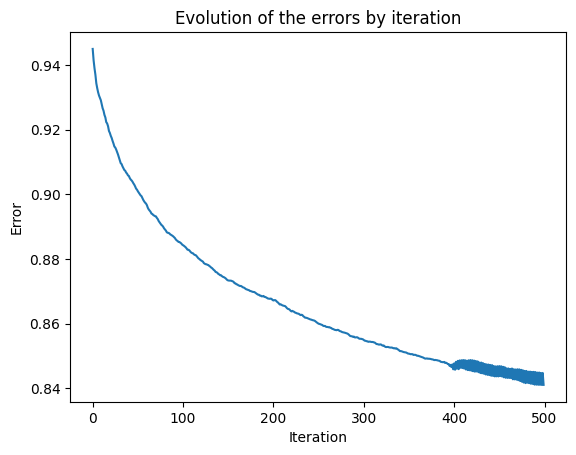

In [95]:
plt.plot(list(range(len(errors))),errors)
plt.title('Evolution of the errors by iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')

In [39]:
pred_tests = model.predict(X_test)

## VII. Générer le csv final

In [ ]:
import csv 
    
# field names 
fields = ['Index', 'Class'] 
    
# data rows of csv file 
rows = [ [i ,pred_tests[i] ] for i in range(len(pred_tests)) ] 
    
# name of csv file 
filename = "submission.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)